Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 80 samples, validate on 35 samples
Epoch 1/15
11/11 [==============================] - 7s 629ms/step - loss: 1.1140 - accuracy: 0.4000 - val_loss: 0.1095 - val_accuracy: 2.5714
Epoch 2/15
11/11 [==============================] - 1s 53ms/step - loss: 1.0864 - accuracy: 0.3250 - val_loss: 0.1088 - val_accuracy: 2.5714
Epoch 3/15
11/11 [==============================] - 1s 52ms/step - loss: 1.0736 - accuracy: 0.3250 - val_loss: 0.1088 - val_accuracy: 2.5714
Epoch 4/15
11/11 [==============================] - 1s 53ms/step - loss: 1.0637 - accuracy: 0.4261 - val_loss: 0.1078 - val_accuracy: 4.5714
Epoch 5/15
11/11 [==============================] - 1s 52ms/step - loss: 1.0487 - accuracy: 0.5614 - val_loss: 0.1064 - val_accuracy: 4.5714
Epoch 6/15
11/11 [==============================] - 1s 53ms/step - loss: 1.0285 - accuracy: 0.5864 - val_loss: 0.1048 - val_accuracy: 4.5714
Epoch 7/15
11/11 [==============================] - 1s 52ms/step - loss: 1.0072 - accuracy: 0.6057 - val_loss

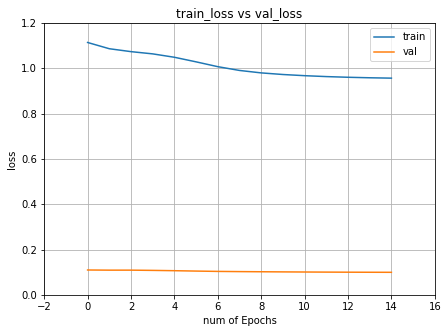

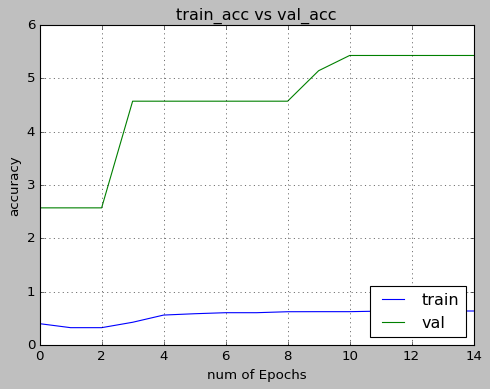

(1, 150, 150, 3)


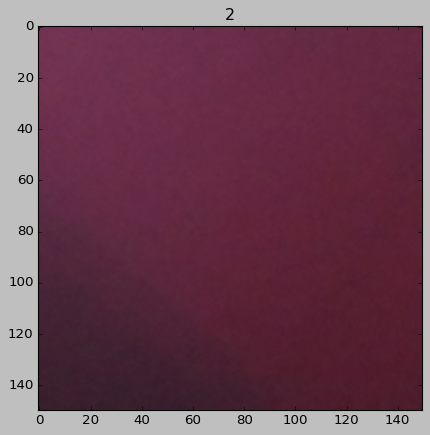

[1]
Predicted class is:  2


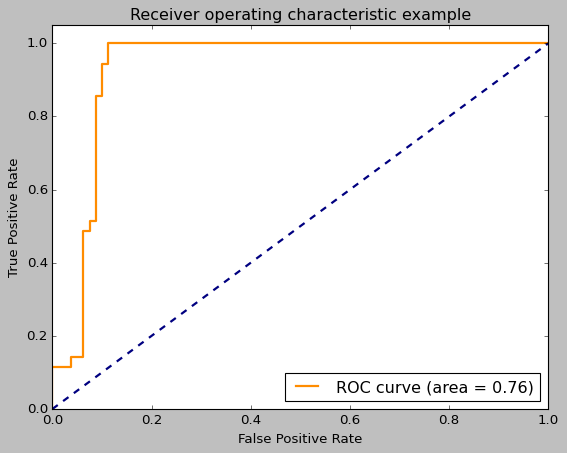

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:223: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


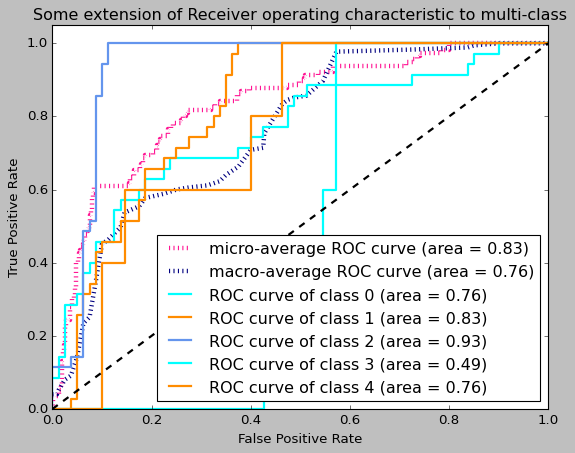

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Person 1       0.00      0.00      0.00        35
    Person 2       0.51      1.00      0.68        35
    Person 3       0.74      1.00      0.85        35
    Person 4       0.00      0.00      0.00         5
    Person 5       0.00      0.00      0.00         5

    accuracy                           0.61       115
   macro avg       0.25      0.40      0.31       115
weighted avg       0.38      0.61      0.47       115

Confusion matrix, without normalization


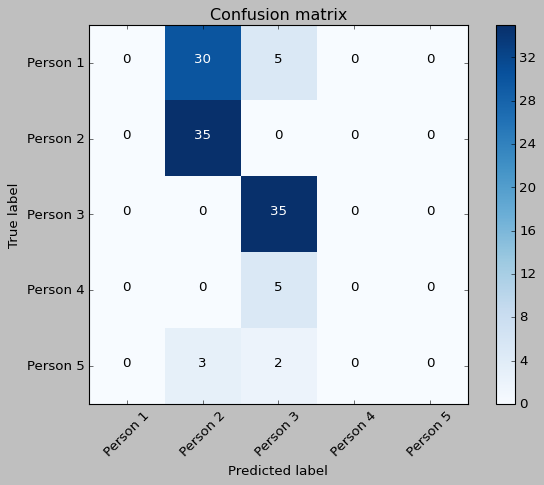

In [1]:
import numpy as np
import os
from os import listdir
from keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.optimizers import Adam
from keras.preprocessing import image
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from numpy import expand_dims
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from keras.utils.np_utils import to_categorical
#from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
#from sklearn.metrics import roc_curve, #auc,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
#from torchvision import datasets, transforms, models
#from imutils import paths
import glob

EPOCHS = 10
INIT_LR = 1e-3
batch_size = 10
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols,3)
#image_size = 0
#directory_root = '/content/drive/My Drive/dataset/'
#width=256
#height=256
#depth=1
data=[]
label_list = []
for filename in glob.glob('/content/drive/My Drive/dataset/train/*.jpg'):
#    print(filename)
    #print(os.path.basename(filename))
    only_file_name = os.path.basename(filename)## hispa_2_output.jpg
    train_img_label = only_file_name.split('_')[0]
    img = load_img(filename)
    img = img_to_array(img)
    data.append(img)
    label_list.append(train_img_label)
   
np_data = np.array(data, dtype=np.float16) / 255.0
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
   

x_train, x_test, y_train, y_test = train_test_split(np_data, image_labels, test_size=0.30, random_state = 0)
classifier = Sequential()
chanDim = -1

# step - 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), padding='valid'))
classifier.add(Activation('relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))


classifier.add(Flatten())
#classifier.add(Dense(64))
#classifier.add(Activation('relu'))
#classifier.add(Dropout(0.5))
##classifier.add(Dense(5))
#classifier.add(Activation('softmax')) 
# Compiling the CNN
classifier.add(Dense(5, input_dim=32,
                kernel_regularizer=regularizers.l2(0.001)))
classifier.add(Activation('softmax'))
opt = Adam(lr=1e-4)

classifier.summary()

# Compiling the CNN
classifier.compile(
    optimizer=opt,
    loss='hinge',
    metrics=['accuracy']
)

hist=classifier.fit( x_train,y_train,
                    steps_per_epoch=11,
    verbose=1,
    nb_epoch=15,
    validation_data=(x_test,y_test),
    validation_steps = 10
)

#confusion_matrics
Y_pred = classifier.predict(x_test)
##print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)

# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(15)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

##load the image with the required shape
img = load_img('/content/drive/My Drive/dataset/test/2_Palmvein_L17.jpg', target_size=(150, 150))
# convert the image to an array
img1 = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img1 = expand_dims(img1, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img1 /= 255.
plt.show()
print(img1.shape)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes1 = classifier.predict_classes(images, batch_size=10)
imgplot = plt.imshow(img)
plt.title('2')
plt.show()
print(classes1)
if classes1==0:
    print('Predicted class is: 1')
elif classes1==1:
    print('Predicted class is:  2')
elif classes1==2:
    print('Predicted class is: 3')
elif classes1==3:
    print('Predicted class is: 4')
else:
    print('Predicted class is: 5')
data1=[]
label_list1 = []
for filename in glob.glob('/content/drive/My Drive/dataset/train/*.jpg'):
#    print(filename)
    #print(os.path.basename(filename))
    only_file_name1 = os.path.basename(filename)## hispa_2_output.jpg
    train_img_label1 = only_file_name1.split('_')[0]
    img = load_img(filename)
    img = img_to_array(img)
    data1.append(img)
    label_list1.append(train_img_label1)
   
np_data1 = np.array(data1, dtype=np.float16) / 255.0
label_binarizer = LabelBinarizer()
image_labels1 = label_binarizer.fit_transform(label_list1)

Y_pred = classifier.predict(np_data1)
##print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
from scipy import interp
from itertools import cycle
n_classes=5
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(image_labels1[:, i],Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(image_labels1.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
def multiclass_roc_auc_score(image_labels1, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(image_labels)
    y_test = lb.transform(image_labels1)
    y_pred = lb.transform(Y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC c
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
        label='micro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["micro"]),
        color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
        label='macro-average ROC curve (area = {0:0.2f})'
              ''.format(roc_auc["macro"]),
        color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
            label='ROC curve of class {0} (area = {1:0.2f})'
            ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


Y_pred = classifier.predict(np_data1)
y_pred = np.argmax(Y_pred, axis=1)


target_names = ['Person 1', 'Person 2', 'Person 3','Person 4','Person 5']
print(classification_report(np.argmax(image_labels1,axis=1), y_pred,target_names=target_names))

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = (confusion_matrix(np.argmax(image_labels1,axis=1), y_pred))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix', normalize=False)
